link do dataset: https://www.kaggle.com/laotse/credit-risk-dataset?select=credit_risk_dataset.csv

# Objetivo : Quais fatores influenciam na classificação do empréstimo como sendo de risco ou não.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dados_analise_risco_de_cresdito.csv')

In [3]:
df.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo,tipo_moradia_id,objetivo_emprestimo_id,class_risco_historico_id
0,21,5.0,propria,educacao,1000,11.14,9600,0.10,B,0,2,0,3,1,1
1,25,1.0,hipoteca,saude,5500,12.87,9600,0.57,C,0,3,1,1,5,2
2,23,4.0,alugada,saude,35000,15.23,65500,0.53,C,0,2,1,0,5,2
3,24,8.0,alugada,saude,35000,14.27,54400,0.55,C,1,4,1,0,5,2
4,21,2.0,propria,risco,2500,7.14,9900,0.25,A,0,2,1,3,4,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31679 entries, 0 to 31678
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         31679 non-null  int64  
 1   tempo_de_emprego              31679 non-null  float64
 2   tipo_moradia                  31679 non-null  object 
 3   objetivo_emprestimo           31679 non-null  object 
 4   montante_emprestimo           31679 non-null  int64  
 5   taxa_juros                    31679 non-null  float64
 6   renda_por_ano                 31679 non-null  int64  
 7   porc_empr_renda_anual         31679 non-null  float64
 8   class_risco_historico         31679 non-null  object 
 9   inadimplencia_hist            31679 non-null  int64  
 10  qtd_anos_primeiro_emprestimo  31679 non-null  int64  
 11  risco_emprestimo              31679 non-null  int64  
 12  tipo_moradia_id               31679 non-null  int64  
 13  o

# EDA

- Transformar variáveis categóricas em variáveis numéricas.

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


df['tipo_moradia_id']  = encoder.fit_transform(df['tipo_moradia'])
df['objetivo_emprestimo_id']  = encoder.fit_transform(df['objetivo_emprestimo'])
df['class_risco_historico_id']  = encoder.fit_transform(df['class_risco_historico'])

- Analisando oa dados.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,31679.0,27.730673,6.213427,20.00,23.00,26.000000,30.00,94.00
tempo_de_emprego,31679.0,4.782064,4.034948,0.00,2.00,4.000000,7.00,41.00
montante_emprestimo,31679.0,9659.962436,6334.360554,500.00,5000.00,8000.000000,12500.00,35000.00
taxa_juros,31679.0,11.037008,3.070182,5.42,8.49,11.011695,13.16,23.22
renda_por_ano,31679.0,66490.099182,52768.793429,4000.00,39366.00,56000.000000,80000.00,2039784.00
porc_empr_renda_anual,31679.0,0.169610,0.106269,0.00,0.09,0.150000,0.23,0.83
inadimplencia_hist,31679.0,0.177657,0.382230,0.00,0.00,0.000000,0.00,1.00
qtd_anos_primeiro_emprestimo,31679.0,5.809211,4.059710,2.00,3.00,4.000000,8.00,30.00
risco_emprestimo,31679.0,0.215442,0.411135,0.00,0.00,0.000000,0.00,1.00
tipo_moradia_id,31679.0,0.648190,0.831427,0.00,0.00,0.000000,1.00,3.00


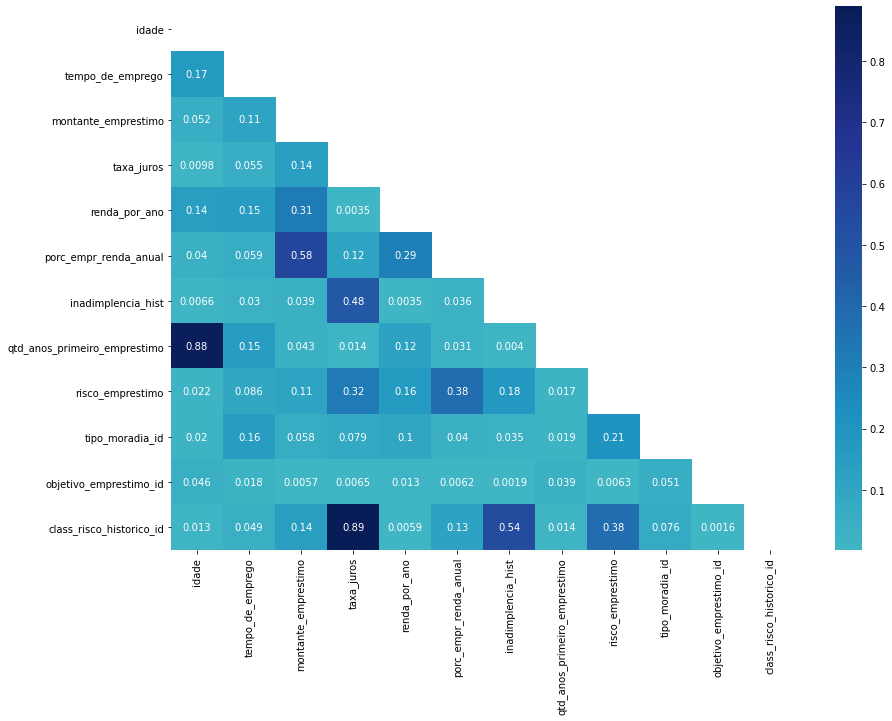

In [7]:
plt.figure(figsize=(14,10))

corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

plt.show()

Taxa de juros empregada no empréstimo

Renda por ano de quem solicita o empréstimo

Porcentagem da renda anual de quem solicita o empréstimo

Inadimplência hitórica

Classificação de risco histório

Tipo de moradia 

# Taxa de juros empregada no empréstimo

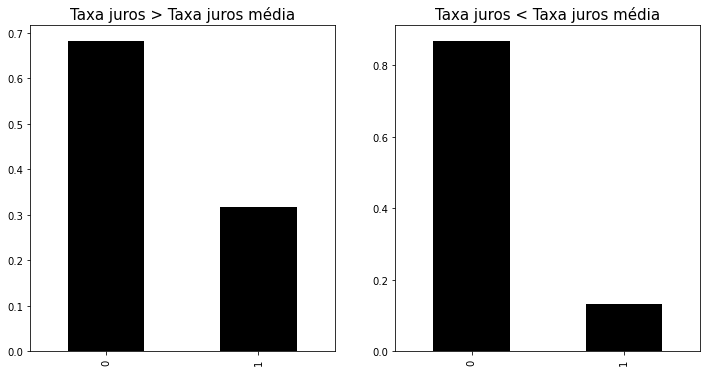

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['taxa_juros'] > 11.037157].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='k')
ax[0].set_title('Taxa juros > Taxa juros média',fontsize=15)

df[df['taxa_juros'] < 11.037157].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='k')
ax[1].set_title('Taxa juros < Taxa juros média',fontsize=15)

plt.show()

Analisando os gráficos acimas pode-se concluir que :

- quando a taxa de juros empregada é maior que o valor médio da taxa de juros, os empréstimos classificados como sendo de risco representam pouco mais que 30% e que quando ocorre o contrário, os empréstimos classificados como sendo de risco representam menos que 15%.

# Porcentagem da renda anual

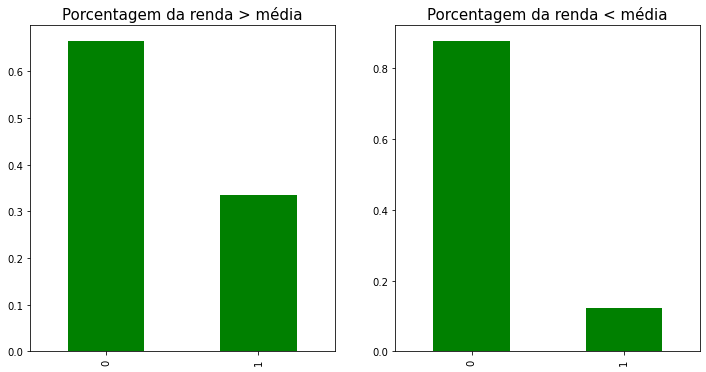

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['porc_empr_renda_anual'] > 0.169612].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='green')
ax[0].set_title('Porcentagem da renda > média',fontsize=15)

df[df['porc_empr_renda_anual'] < 0.169612].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Porcentagem da renda < média',fontsize=15)

plt.show()

Analisando os gráficos acimas pode-se concluir que :

- quando a porcentagem da renda ultrapassa o valor médio da porcentagem da renda anual, os empréstimos classificados como sendo de risco representam pouco mais que 30% e que quando ocorre o contrário, os empréstimos classificados como sendo de risco representam menos que 15%.

# Renda anual

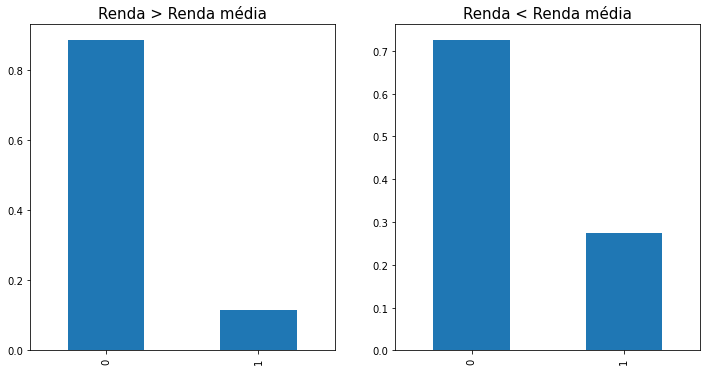

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,6))


df[df['renda_por_ano'] > 66691.878306].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0])
ax[0].set_title('Renda > Renda média',fontsize=15)

df[df['renda_por_ano'] < 66691.878306].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1])
ax[1].set_title('Renda < Renda média',fontsize=15)

plt.show()

Analisando os gráficos acimas pode-se concluir que :

- quando a  renda ultrapassa o valor médio da renda anual, os empréstimos classificados como sendo de risco representam pouco menos que 15% e que quando ocorre o contrário, os empréstimos classificados como sendo de risco representam quase que 30%.

# Inadimplência histórica

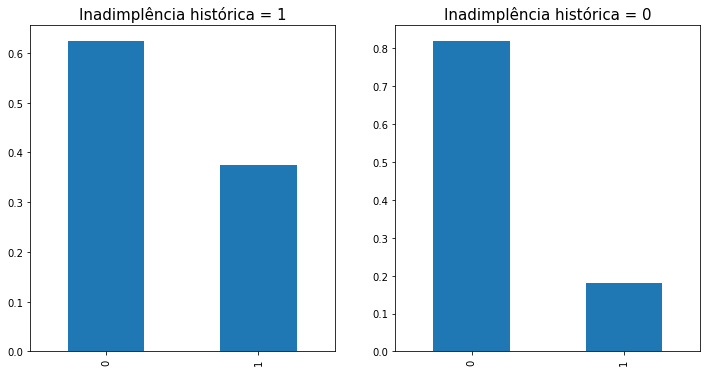

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,6))


df[df['inadimplencia_hist'] ==1 ].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0])
ax[0].set_title('Inadimplência histórica = 1',fontsize=15)

df[df['inadimplencia_hist'] == 0 ].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1])
ax[1].set_title('Inadimplência histórica = 0',fontsize=15)


plt.show()

Analisando os gráficos acimas pode-se concluir que :

- quando existe histórico de inadimplência a classificação de empréstimos como sendo de risco, em procentagem, é quase que duas vezes maior do que quando não existe histórico de inadimplência.

# Tipo de moradia 

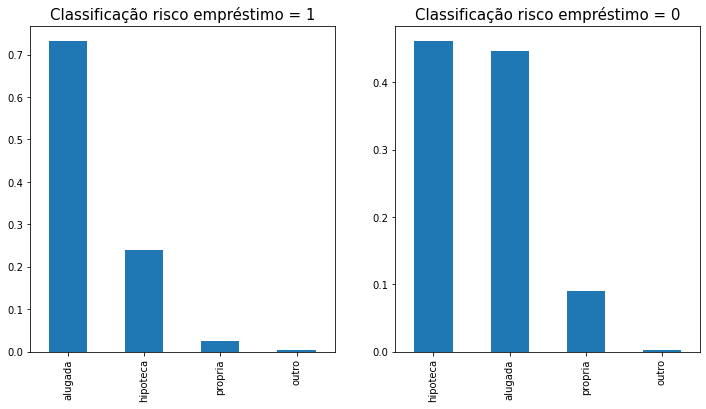

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['risco_emprestimo'] == 1 ].tipo_moradia.value_counts(normalize=True).plot(kind='bar',ax=ax[0])
ax[0].set_title('Classificação risco empréstimo = 1',fontsize=15)

df[df['risco_emprestimo'] == 0 ].tipo_moradia.value_counts(normalize=True).plot(kind='bar',ax=ax[1])
ax[1].set_title('Classificação risco empréstimo = 0',fontsize=15)

plt.show()

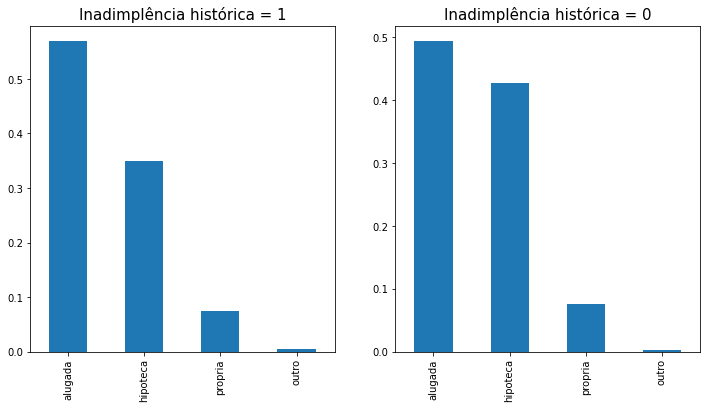

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['inadimplencia_hist'] == 1 ].tipo_moradia.value_counts(normalize=True).plot(kind='bar',ax=ax[0])
ax[0].set_title('Inadimplência histórica = 1',fontsize=15)

df[df['inadimplencia_hist'] == 0 ].tipo_moradia.value_counts(normalize=True).plot(kind='bar',ax=ax[1])
ax[1].set_title('Inadimplência histórica = 0',fontsize=15)

plt.show()

# Classificação de risco histórico

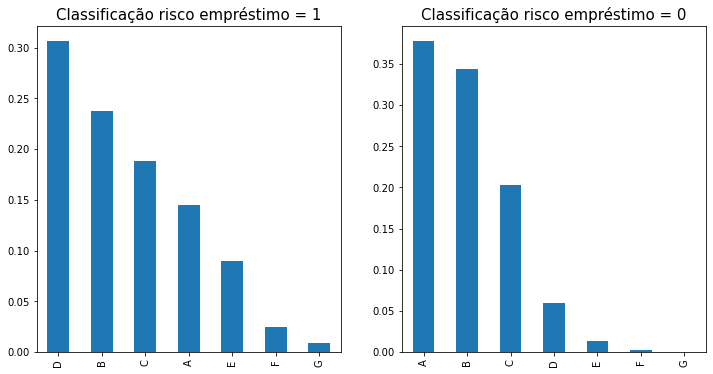

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['risco_emprestimo'] ==1 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[0])
ax[0].set_title('Classificação risco empréstimo = 1',fontsize=15)

df[df['risco_emprestimo'] == 0 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[1])
ax[1].set_title('Classificação risco empréstimo = 0',fontsize=15)

plt.show()

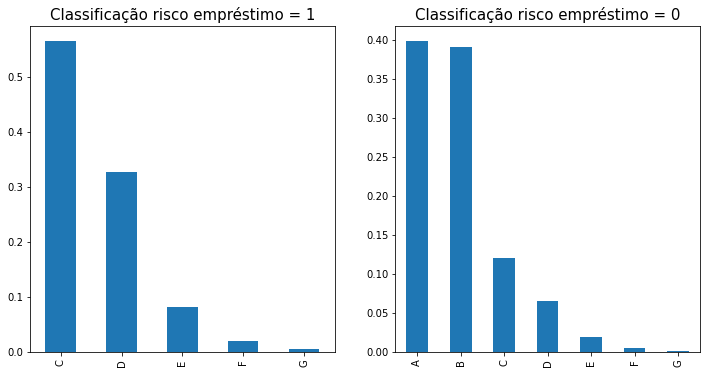

In [20]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['inadimplencia_hist'] ==1 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[0])
ax[0].set_title('Classificação risco empréstimo = 1',fontsize=15)

df[df['inadimplencia_hist'] == 0 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[1])
ax[1].set_title('Classificação risco empréstimo = 0',fontsize=15)

plt.show()

## Analisando a inadimplecencia histórica e o risco de empréstimo.

In [28]:
df.query('inadimplencia_hist==1 and risco_emprestimo == 0 ').tipo_moradia.value_counts(normalize=True)

alugada     0.488048
hipoteca    0.400398
propria     0.107854
outro       0.003699
Name: tipo_moradia, dtype: float64

Analisando os graficos acimas podemos concluir que:

  - Quando que existe uma relação uito fore entre a classe do 

#  Observando a faixa etária das pessoas com um histórico de inadimplência.

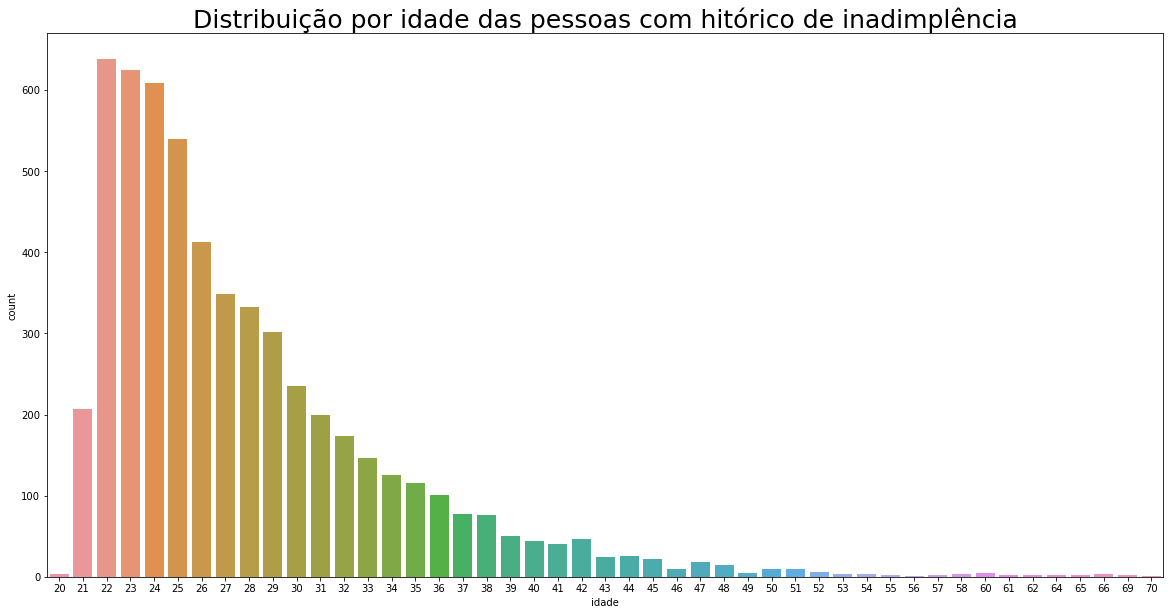

In [15]:
plt.figure(figsize=(20,10))

ax  = sns.countplot(x='idade',data=df[df['inadimplencia_hist']==1])
ax.set_title('Distribuição por idade das pessoas com hitórico de inadimplência',fontsize=25)
plt.show()

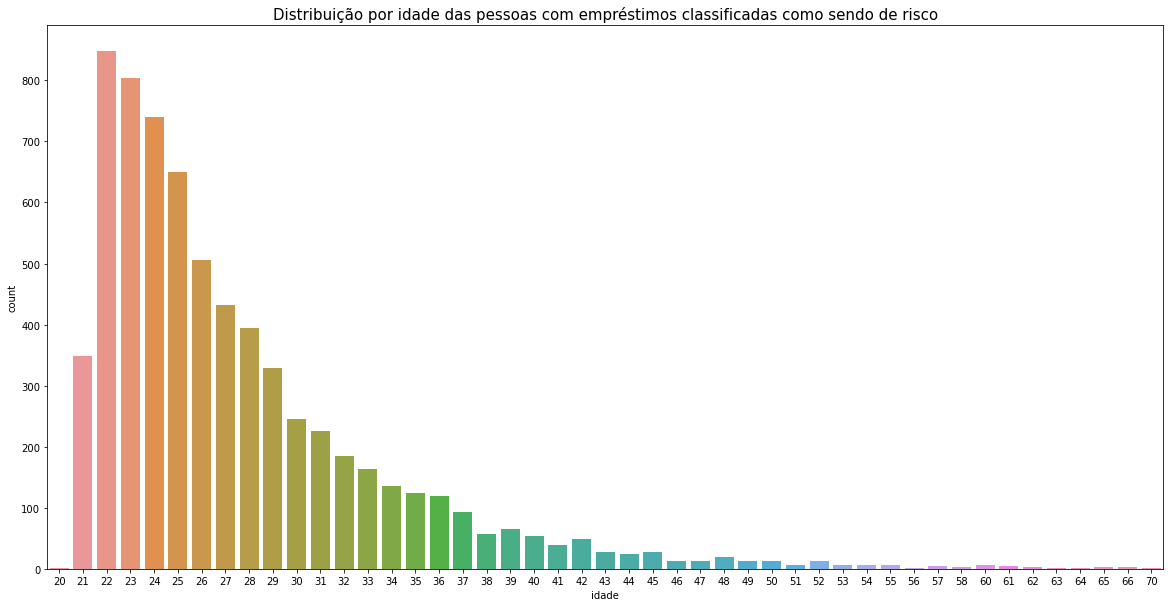

In [16]:
plt.figure(figsize=(20,10))

ax  = sns.countplot(x='idade',data=df[df['risco_emprestimo']==1])
ax.set_title('Distribuição por idade das pessoas com empréstimos classificadas como sendo de risco',fontsize=15)
plt.show()

- Analisando a faixa etária e a classificação do risco do empréstimo, pode-se concluir que o maior volume de empréstimos solicitados vai dos 21 anos até os 35 anos.


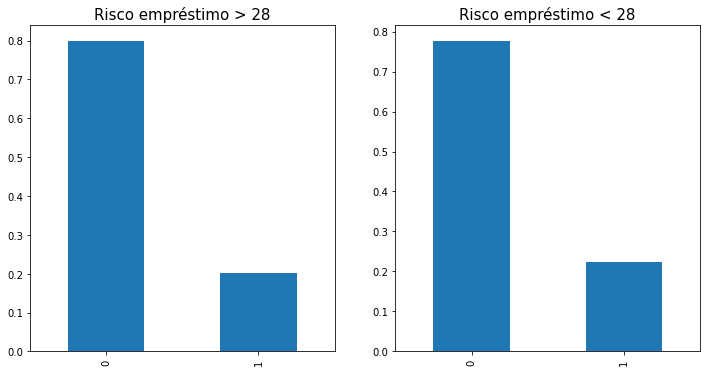

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['idade'] > 28 ].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0])
ax[0].set_title('Risco empréstimo > 28',fontsize=15)

df[df['idade'] < 28 ].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1])
ax[1].set_title('Risco empréstimo < 28',fontsize=15)

plt.show()

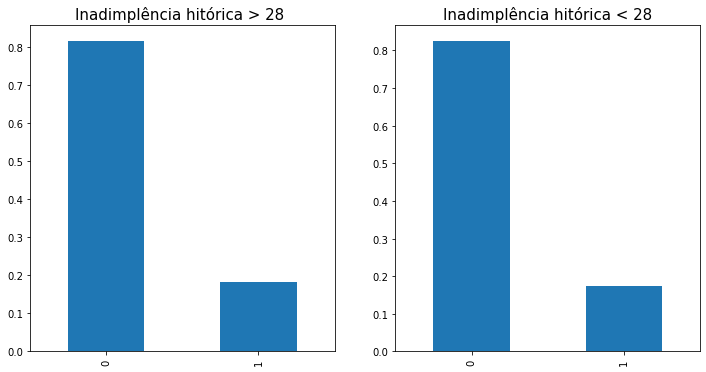

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['idade'] > 28 ].inadimplencia_hist.value_counts(normalize=True).plot(kind='bar',ax=ax[0])
ax[0].set_title('Inadimplência hitórica > 28 ',fontsize=15)

df[df['idade'] < 28 ].inadimplencia_hist.value_counts(normalize=True).plot(kind='bar',ax=ax[1])
ax[1].set_title('Inadimplência hitórica < 28',fontsize=15)

plt.show()

- A idade não te muita  influência tanto na classificação histórica quanto na classificação de risco do empréstimo.

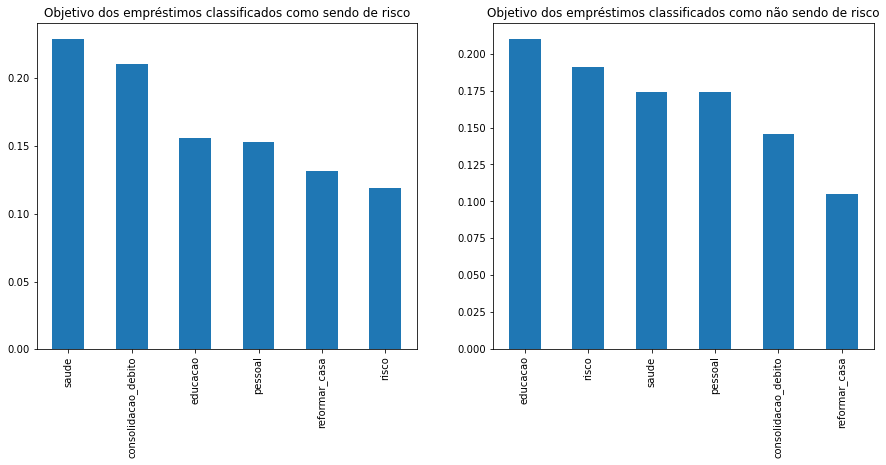

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

df[df['risco_emprestimo'] ==1].objetivo_emprestimo.value_counts(normalize=True).plot(kind='bar', ax=ax[0])
ax[0].set_title('Objetivo dos empréstimos classificados como sendo de risco')


df[df['risco_emprestimo'] ==0].objetivo_emprestimo.value_counts(normalize=True).plot(kind='bar', ax=ax[1])
ax[1].set_title('Objetivo dos empréstimos classificados como não sendo de risco')

plt.show()